In [1]:
%env PROJ_LIB=/Users/nickvancise/opt/anaconda3/share/proj

from netCDF4 import Dataset
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
#from e582utils.data_read import download
import warnings
warnings.filterwarnings("ignore")

l3filepar="/Users/nickvancise/Downloads/A2020334.L3m_DAY_PAR_par_4km.nc"
l3filepic="/Users/nickvancise/Downloads/A2020334.L3m_DAY_PIC_pic_4km.nc"

env: PROJ_LIB=/Users/nickvancise/opt/anaconda3/share/proj


In [2]:
!ncdump -h $l3filepic

netcdf A2020334.L3m_DAY_PIC_pic_4km {
dimensions:
	lat = 4320 ;
	lon = 8640 ;
	rgb = 3 ;
	eightbitcolor = 256 ;
variables:
	short pic(lat, lon) ;
		pic:long_name = "Calcite Concentration, Balch and Gordon" ;
		pic:scale_factor = 2.e-06f ;
		pic:add_offset = 0.065f ;
		pic:units = "mol m^-3" ;
		pic:_FillValue = -32767s ;
		pic:valid_min = -32500s ;
		pic:valid_max = 30000s ;
		pic:reference = "Balch, W.M., Gordon, H.R., Bowler, B.C., Drapeau, D.T., and Booth, E.S. (2005), Calcium carbonate measurements in the surface global ocean based on Moderate-Resolution Imaging Spectroradiometer data, J. Geophys. Res., 110, C07001, doi:10.1029/2004JC002560; Gordon, H.R. Boynton, G.C., Balch, W.M., Groom, S.B., Harbour, D.S., Smyth, T.J., Retrieval of Coccolithophore Calcite Concentration from SeaWiFS Imagery, GRL, 28, 8, 1587-1590." ;
		pic:display_scale = "log" ;
		pic:display_min = 1.e-05f ;
		pic:display_max = 0.05f ;
	float lat(lat) ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north

In [3]:
!ncdump -h $l3filepar

netcdf A2020334.L3m_DAY_PAR_par_4km {
dimensions:
	lat = 4320 ;
	lon = 8640 ;
	rgb = 3 ;
	eightbitcolor = 256 ;
variables:
	short par(lat, lon) ;
		par:long_name = "Photosynthetically Available Radiation, R. Frouin" ;
		par:scale_factor = 0.002f ;
		par:add_offset = 65.5f ;
		par:units = "einstein m^-2 day^-1" ;
		par:standard_name = "surface_downwelling_photosynthetic_photon_flux_in_air" ;
		par:_FillValue = -32767s ;
		par:valid_min = -32750s ;
		par:valid_max = 32250s ;
		par:reference = "Frouin, R., Ligner, D.W., and Gautier, C., 1989: A Simple analytical formula to compute clear sky total and photosynthetically available solar irradiance at the ocean surface. J. Geophys. Res., 94, 9731-9742." ;
		par:display_scale = "linear" ;
		par:display_min = 0.f ;
		par:display_max = 76.2f ;
	float lat(lat) ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:standard_name = "latitude" ;
		lat:_FillValue = -999.f ;
		lat:valid_min = -90.f ;
		lat:valid_max = 90.f ;
	float lo

In [4]:
def plot(file, myselect, colorscale, mvmin, mvmax):
    with Dataset(file,'r') as ncdat:
        ncdat.set_auto_mask(False)
        cdfvalue=ncdat.variables[myselect][...]
        
        lat=ncdat.variables['lat'][...]
        lon=ncdat.variables['lon'][...]
        
        fill_value=ncdat.variables[myselect]._FillValue
        #print(fill_value)
        
    hit= cdfvalue == fill_value
    cdfvalue[hit] = np.nan
    #print(cdfvalue)
    
    print("median:",np.median(cdfvalue))
    print("min:",np.min(cdfvalue))
    print("max:",np.max(cdfvalue))
    print("Generating plot, please wait")
    
    cmap=colorscale #see http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps
    cmap.set_over('r')
    cmap.set_under('0.85')
    cmap.set_bad('0.75') #75% grey
    vmin= mvmin
    vmax= mvmax
    the_norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax,clip=False)
    
    %matplotlib inline
    bmap=Basemap(projection='robin',lon_0=0)
    lonvals,latvals = np.meshgrid(lon,lat)
    fig, ax = plt.subplots(1,1,figsize=(24,20))
    xvals,yvals=bmap(lonvals,latvals)
    cs=bmap.pcolormesh(xvals,yvals,cdfvalue,cmap=cmap,norm=the_norm)
    bmap.fillcontinents(color='grey',lake_color='cyan');
    colorbar=fig.colorbar(cs, shrink=0.5, pad=0.05,extend='both')

median: -0.03400421
min: -0.03400421
max: 68.644
Generating plot, please wait


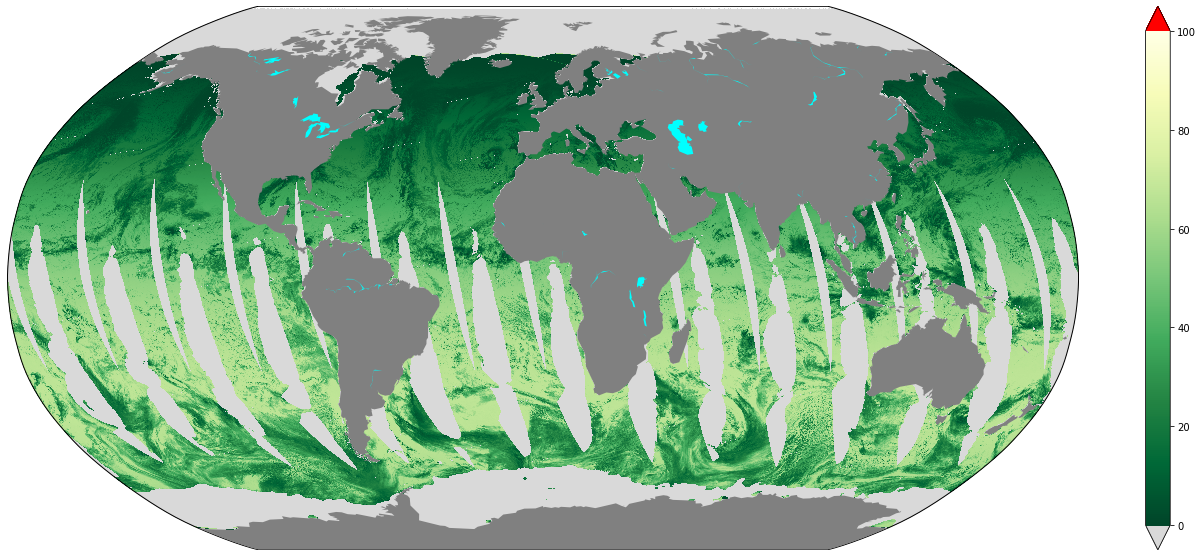

In [5]:
plot(l3filepar, "par", matplotlib.cm.YlGn_r, 0, 100)

median: -0.00053400546
min: -0.00053400546
max: 0.130534
Generating plot, please wait


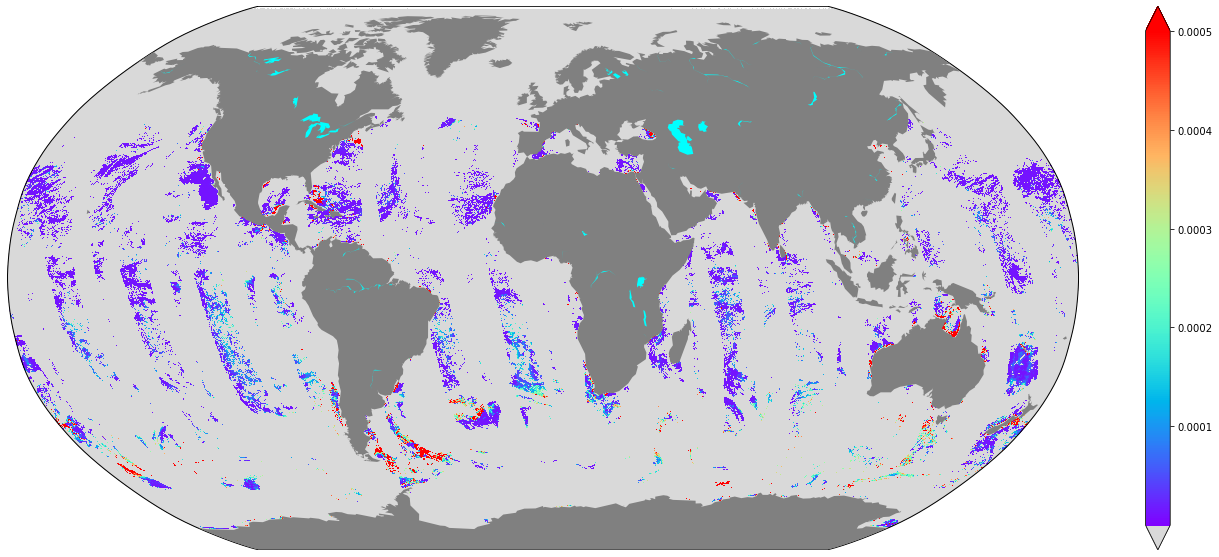

In [6]:
plot(l3filepic, "pic", plt.get_cmap("rainbow"), 1e-10, 0.0005)